## Loading the Libraries and the Dataset

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df = pd.read_csv('/content/Automobile_insurance_fraud.csv')

In [218]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Understanding the data

Months as Customer

Comments - We will keep this column as it is.

In [219]:
df['months_as_customer'].value_counts()

,count
months_as_customer,
194,8
128,7
254,7
140,7
210,7
...,...
390,1
411,1
453,1


Age

Comments- We will keep this column as there could be a relation with the target column. People belonging in a certain age group might be more prone to commiting frauds.

In [220]:
df['age'].value_counts()

,count
age,
43,49
39,48
41,45
34,44
38,42
30,42
31,42
37,41
33,39


In [221]:
df['age'].nunique()

46

Policy Number

Comments - Since this column has a unique value for each and every instance, we can get rid of this column as it won't provide any predictive power.

In [222]:
df['policy_number'].value_counts()

,count
policy_number,
521585,1
687755,1
674485,1
223404,1
991480,1
...,...
563878,1
620855,1
583169,1


In [223]:
df.drop('policy_number', axis=1, inplace=True)

Policy Bind Date

Comments - Let us convert the column into datetime as of now.

In [224]:
df['policy_bind_date'][1], df['months_as_customer'][1]

('27-06-2006', 228)

In [225]:
df['policy_bind_date'].value_counts()

,count
policy_bind_date,
01-01-2006,3
28-04-1992,3
05-08-1992,3
14-12-1991,2
09-08-2004,2
...,...
03-06-2014,1
12-12-1998,1
18-02-1999,1


In [226]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')

<ipython-input-226-403faa850522>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')


In [227]:
df['policy_bind_date']

,policy_bind_date
0,2014-10-17
1,2006-06-27
2,2000-09-06
3,1990-05-25
4,2014-06-06
...,...
995,1991-07-16
996,2014-01-05
997,2003-02-17
998,2011-11-18


Policy State

Comments - We will convert this column into binary data.

In [228]:
df['policy_state'].value_counts()

,count
policy_state,
OH,352
IL,338
IN,310


In [229]:
df = pd.get_dummies(df, columns=['policy_state'], drop_first=True)

In [230]:
df['policy_state_IN'] = df['policy_state_IN'].astype(int)

In [231]:
df['policy_state_OH'] = df['policy_state_OH'].astype(int)

Policy CSL

Comments - This particular column has ordinal relationship. CSL (Combined Single Limit) is the maximum amount an insurance company will pay for all bodily injury and property damage resulting from a single accident. The values such as 250/500, 100/300, and 500/1000 typically indicate the limits in thousands of dollar.

In [232]:
df['policy_csl'].value_counts()

,count
policy_csl,
250/500,351
100/300,349
500/1000,300


In [233]:
csl_mapping = {'100/300': 0, '250/500': 1, '500/1000': 2}
df['policy_csl'] = df['policy_csl'].map(csl_mapping)

Policy Deductable

Comments - Since the deductible amounts have a clear numerical order (higher deductibles mean more out-of-pocket costs for the insured), it makes sense to keep this column as-is in its current form of integer values.

In [234]:
df['policy_deductable'].value_counts()

,count
policy_deductable,
1000,351
500,342
2000,307


Policy Annual Premium

Comments - We will keep this column as it is. This column represents the premium.

In [235]:
df['policy_annual_premium'].value_counts()

,count
policy_annual_premium,
1558.29,2
1215.36,2
1362.87,2
1073.83,2
1389.13,2
...,...
1085.03,1
1437.33,1
988.29,1


Umbrella Limit

In [236]:
df['umbrella_limit'].value_counts()

,count
umbrella_limit,
0,798
6000000,57
5000000,46
4000000,39
7000000,29
3000000,12
8000000,8
9000000,5
2000000,3


Insured zip

Comments - Since this column does not provide any predictive power, we will get rid of this column.

In [237]:
df['insured_zip'].value_counts()

,count
insured_zip,
477695,2
469429,2
446895,2
431202,2
456602,2
...,...
476303,1
450339,1
476502,1


In [238]:
df.drop('insured_zip', axis=1, inplace=True)

Insured Sex

Comments - We will binary encode this column.

In [239]:
df['insured_sex'].value_counts()

,count
insured_sex,
FEMALE,537
MALE,463


In [240]:
df['insured_sex'] = df['insured_sex'].map({'FEMALE': 0, 'MALE': 1})

Insured Education Level

Comments - We will encode this column using Ordinal encoding as there is an obvious hierarchy in the column.

In [241]:
df['insured_education_level'].value_counts()

,count
insured_education_level,
JD,161
High School,160
Associate,145
MD,144
Masters,143
PhD,125
College,122


In [242]:
education_mapping = {
    'High School': 0,
    'Associate': 1,
    'College': 2,
    'JD': 3,
    'MD': 4,
    'Masters': 5,
    'PhD': 6
}

df['insured_education_level_encoded'] = df['insured_education_level'].map(education_mapping)


In [243]:
df.drop('insured_education_level', axis=1, inplace=True)

Insured Occupation

In [244]:
df['insured_occupation'].value_counts()

,count
insured_occupation,
machine-op-inspct,93
prof-specialty,85
tech-support,78
sales,76
exec-managerial,76
craft-repair,74
transport-moving,72
other-service,71
priv-house-serv,71


Insured Hobbies

In [245]:
df['insured_hobbies'].value_counts()

,count
insured_hobbies,
reading,64
exercise,57
paintball,57
bungie-jumping,56
movies,55
golf,55
camping,55
kayaking,54
yachting,53


Insured Relationship

In [246]:
df['insured_relationship'].value_counts()

,count
insured_relationship,
own-child,183
other-relative,177
not-in-family,174
husband,170
wife,155
unmarried,141


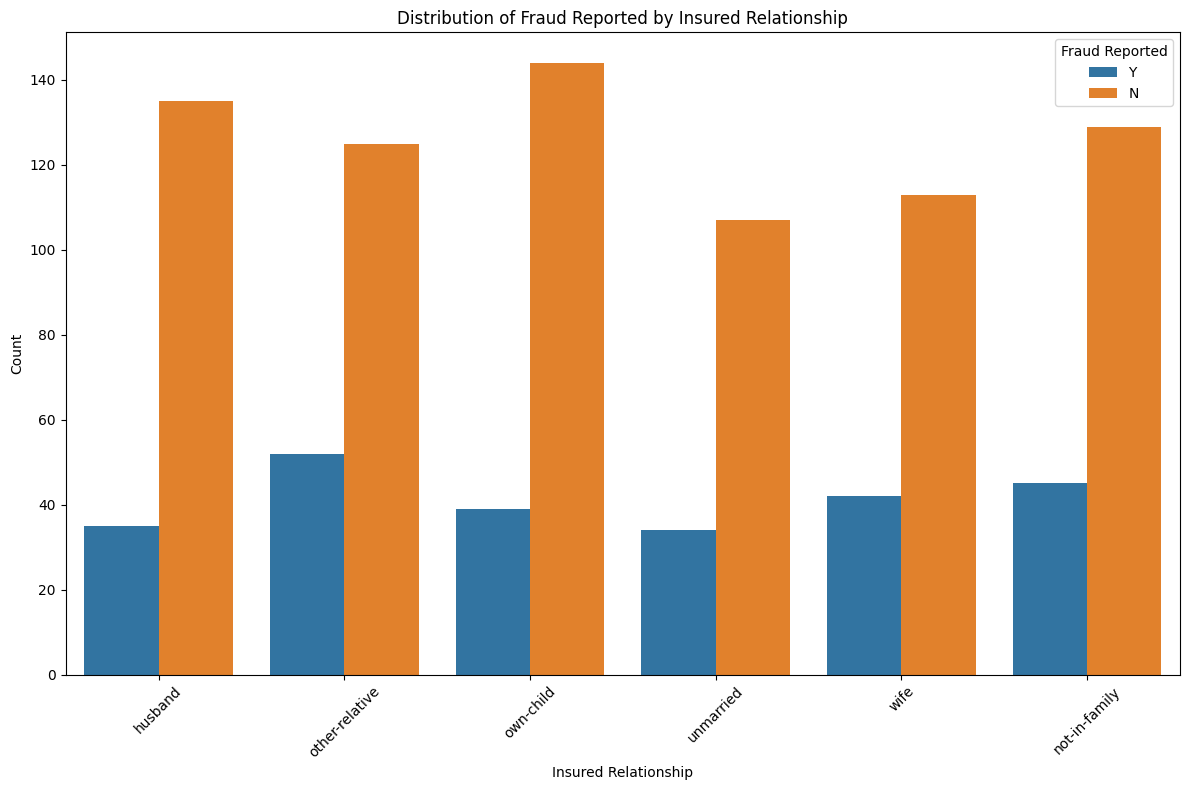

In [247]:
plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='insured_relationship', hue='fraud_reported')

plt.title('Distribution of Fraud Reported by Insured Relationship')
plt.xlabel('Insured Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')

plt.tight_layout()
plt.show()


In [248]:
df['fraud_reported']

,fraud_reported
0,Y
1,Y
2,N
3,Y
4,N
...,...
995,N
996,N
997,N
998,N


Capital gain

Comment - We will keep this column as it is but we this data seems to be extremely skewed.

In [250]:
df['capital-gains'].value_counts()

,count
capital-gains,
0,508
46300,5
51500,4
68500,4
55600,3
...,...
36700,1
54900,1
69200,1


Capital Loss

Comment - We will keep this column as it is but we this data seems to be extremely skewed.

In [251]:
df['capital-loss'].value_counts()

,count
capital-loss,
0,475
-31700,5
-53700,5
-50300,5
-45300,4
...,...
-12100,1
-17000,1
-72900,1


Incident Date

Comment - We will convert this column to datatime and subtract this later from policy bind date, to calculate the time difference and maybe use as a variable while prediction.

In [252]:
df['incident_date'].value_counts()

,count
incident_date,
02-02-2015,28
17-02-2015,26
07-01-2015,25
10-01-2015,24
04-02-2015,24
24-01-2015,24
19-01-2015,23
08-01-2015,22
13-01-2015,21


In [253]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')

<ipython-input-253-66d45619e3fd>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')


In [254]:
df['incident_date']

,incident_date
0,2015-01-25
1,2015-01-21
2,2015-02-22
3,2015-01-10
4,2015-02-17
...,...
995,2015-02-22
996,2015-01-24
997,2015-01-23
998,2015-02-26


Incident Type

In [255]:
df['incident_type'].value_counts()

,count
incident_type,
Multi-vehicle Collision,419
Single Vehicle Collision,403
Vehicle Theft,94
Parked Car,84


Collision Type

In [256]:
df['collision_type'].value_counts()

,count
collision_type,
Rear Collision,292
Side Collision,276
Front Collision,254
?,178


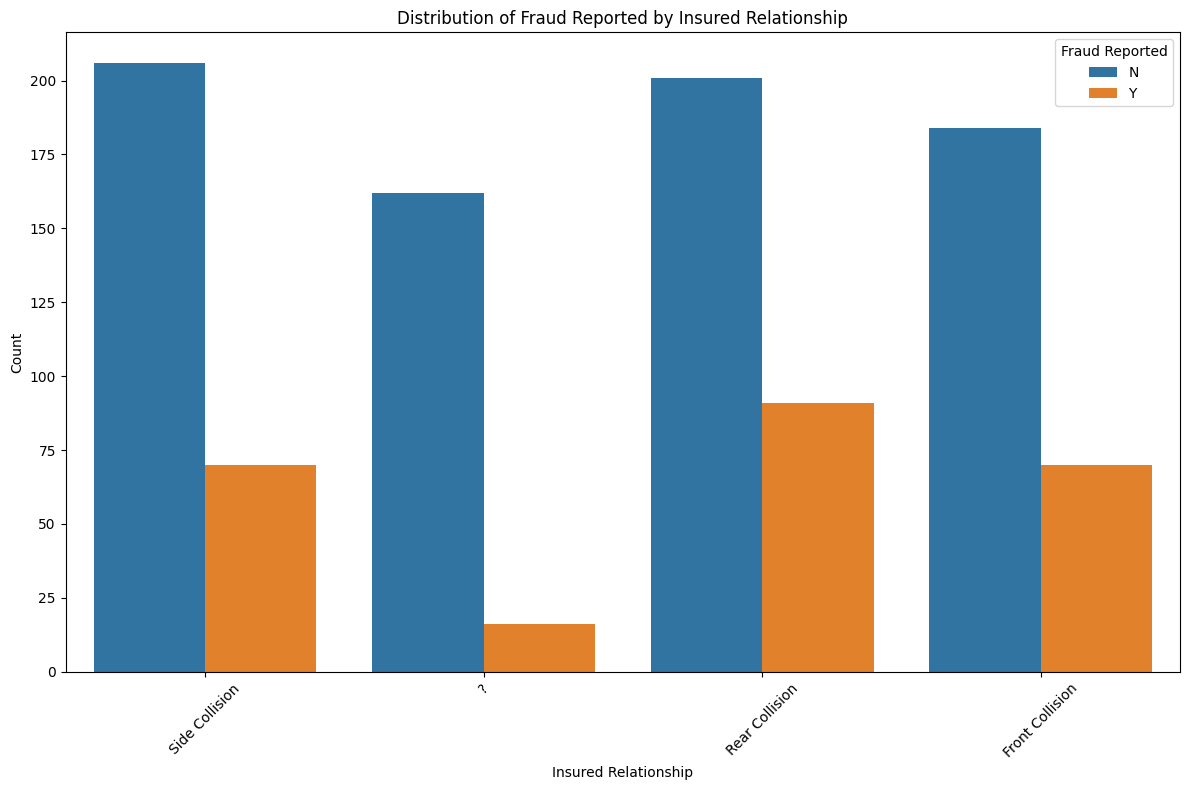

In [257]:
plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='collision_type', hue='fraud_reported')

plt.title('Distribution of Fraud Reported by Insured Relationship')
plt.xlabel('Insured Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')

plt.tight_layout()
plt.show()

Incident Severity

In [258]:
df['incident_severity'].value_counts()

,count
incident_severity,
Minor Damage,354
Total Loss,280
Major Damage,276
Trivial Damage,90


In [259]:
severity_order = {
    'Trivial Damage': 0,
    'Minor Damage': 1,
    'Major Damage': 2,
    'Total Loss': 3
}

df['incident_severity_encoded'] = df['incident_severity'].map(severity_order)


In [260]:
df.drop('incident_severity', axis=1, inplace=True)

Authorities Contacted

In [261]:
df['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196


Incident State

In [262]:
df['incident_state'].value_counts()

,count
incident_state,
NY,262
SC,248
WV,217
VA,110
NC,110
PA,30
OH,23


Incident City

Comments - We will get rid of this column as it seems to be too granular in nature and is not providing any evident information. One might argue why State makes sense and city does not. Its because laws usually change according to state unlike cities.

In [263]:
df['incident_city'].value_counts()

,count
incident_city,
Springfield,157
Arlington,152
Columbus,149
Northbend,145
Hillsdale,141
Riverwood,134
Northbrook,122


In [264]:
df.drop('incident_city', axis=1, inplace=True)

Incident Location

Comments - Since this column has all unique values, it does not provide us with a good predictive power and hence we will get rid of this column.

In [265]:
df['incident_location'].value_counts()

,count
incident_location,
9935 4th Drive,1
4214 MLK Ridge,1
8548 Cherokee Ridge,1
2352 MLK Drive,1
9734 2nd Ridge,1
...,...
6770 1st St,1
4119 Texas St,1
4347 2nd Ridge,1


In [266]:
df.drop('incident_location', axis=1, inplace=True)

Incident Hour of the Day

Comments - We will keep this column as it is for now.

In [267]:
df['incident_hour_of_the_day'].value_counts()

,count
incident_hour_of_the_day,
17,54
3,53
0,52
23,51
16,49
13,46
10,46
4,46
6,44


Number of vehicles Involved

Comment - We will keep this column as it is for now.

In [268]:
df['number_of_vehicles_involved'].value_counts()

,count
number_of_vehicles_involved,
1,581
3,358
4,31
2,30


Property Damaged

Comments - When there is ambiguity or when nothing is reported, it is assumed that there was no property damage reported. Hence we will replace all the ? with No.

In [269]:
df['property_damage'].value_counts()

,count
property_damage,
?,360
NO,338
YES,302


In [270]:
df['property_damage_encoded'] = df['property_damage'].map({'YES': 1, 'NO': 0})
df['property_damage_encoded'].replace(np.nan, 0 , inplace=True)
df['property_damage_encoded'] = df['property_damage_encoded'].astype(int)

In [271]:
df['property_damage_encoded'].value_counts()

,count
property_damage_encoded,
0,698
1,302


In [272]:
df.drop('property_damage', axis=1, inplace=True)

Bodily Injuries

Comment - We will keep this column as it is.

In [273]:
df['bodily_injuries'].value_counts()

,count
bodily_injuries,
0,340
2,332
1,328


Witnesses

Comments - We will keep this column as it is.

In [274]:
df['witnesses'].value_counts()

,count
witnesses,
1,258
2,250
0,249
3,243


Police Report Available

Comment - We will encode this column.

In [275]:
df['police_report_available'].value_counts()

,count
police_report_available,
?,343
NO,343
YES,314


In [276]:
df['police_report_available'].replace('?', 'NO', inplace=True)

In [277]:
df['police_report_available_encoded'] = df['police_report_available'].map({'YES': 1, 'NO': 0})

In [278]:
df.drop('police_report_available', axis=1, inplace=True)

Total Claim Amount

Comments -  We will keep this column as it is. We will alter check for skewness and get rid of it.

In [279]:
df['total_claim_amount'].value_counts()

,count
total_claim_amount,
59400,5
2640,4
70400,4
4320,4
44200,4
...,...
65250,1
87100,1
6240,1


Injury Claim

Comments - We will keep this column as it is for now.

In [280]:
df['injury_claim'].value_counts()

,count
injury_claim,
0,25
640,7
480,7
660,5
580,5
...,...
14840,1
6580,1
11820,1


Property Claim

Comments - We will keep this column as it is.

In [281]:
df['property_claim'].value_counts()

,count
property_claim,
0,19
860,6
480,5
660,5
10000,5
...,...
3590,1
6480,1
4580,1


Vehicle Claim

Comments - We will keep this column as it is.

In [282]:
df['vehicle_claim'].value_counts()

,count
vehicle_claim,
5040,7
3360,6
52080,5
4720,5
3600,5
...,...
43360,1
25130,1
38940,1


Auto Make

In [283]:
df['auto_make'].value_counts()

,count
auto_make,
Saab,80
Dodge,80
Suburu,80
Nissan,78
Chevrolet,76
Ford,72
BMW,72
Toyota,70
Audi,69


Auto Model

In [284]:
df['auto_model'].value_counts()

,count
auto_model,
RAM,43
Wrangler,42
A3,37
Neon,37
MDX,36
Jetta,35
Passat,33
A5,32
Legacy,32


Auto Year

Comments -  We will keep this column as it is for now.

In [286]:
df['auto_year'].value_counts()

,count
auto_year,
1995,56
1999,55
2005,54
2006,53
2011,53
2007,52
2003,51
2009,50
2010,50


Fraud Reported

Comments - This is our target column and we will encode this for binary classification.

In [287]:
df['fraud_reported'].value_counts()

,count
fraud_reported,
N,753
Y,247


In [288]:
df['fraud_reported_encoded'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

In [289]:
df.drop('fraud_reported', axis=1, inplace=True)

In [290]:
df['fraud_reported_encoded'] = df['fraud_reported_encoded'].astype(int)

_c39

Comments - We will get rid of this column as it is insignificant as it is completely empty.

In [291]:
df['_c39'].value_counts()

,count
_c39,


In [292]:
df.drop('_c39', axis=1, inplace=True)

Difference between Incident date and Policy bind date in months

In [293]:
import pandas as pd
from dateutil.relativedelta import relativedelta

def calculate_month_difference(row):
    if row['incident_date'] < row['policy_bind_date']:
        date1, date2 = row['incident_date'], row['policy_bind_date']
    else:
        date1, date2 = row['policy_bind_date'], row['incident_date']

    difference = relativedelta(date2, date1)
    total_months_difference = difference.years * 12 + difference.months
    return total_months_difference

df['months_difference2'] = df.apply(calculate_month_difference, axis=1)



In [294]:
df[['policy_bind_date', 'incident_date', 'months_difference2']]

,policy_bind_date,incident_date,months_difference2
0,2014-10-17,2015-01-25,3
1,2006-06-27,2015-01-21,102
2,2000-09-06,2015-02-22,173
3,1990-05-25,2015-01-10,295
4,2014-06-06,2015-02-17,8
...,...,...,...
995,1991-07-16,2015-02-22,283
996,2014-01-05,2015-01-24,12
997,2003-02-17,2015-01-23,143
998,2011-11-18,2015-02-26,39


In [295]:
df.drop('policy_bind_date', axis=1, inplace=True)
df.drop('incident_date', axis=1, inplace=True)

Umbrella Limit

In [298]:
df['umbrella_limit'].value_counts()

,count
umbrella_limit,
0,798
6000000,57
5000000,46
4000000,39
7000000,29
3000000,12
8000000,8
9000000,5
2000000,3


Comments - Let us try to bin the values and convert them into categorical values.

In [299]:
df['umbrella_limit'] = df['umbrella_limit'].replace(-1000000, 0)
bins = [-1, 1000000, 5000000, 10000000]
labels = [0, 1, 2]

df['umbrella_limit_binned'] = pd.cut(df['umbrella_limit'], bins=bins, labels=labels)


In [300]:
df['umbrella_limit_binned'].value_counts()

,count
umbrella_limit_binned,
0,799
2,101
1,100


In [301]:
df['umbrella_limit_binned'] = df['umbrella_limit_binned'].astype(int)

In [302]:
df.drop('umbrella_limit', axis=1, inplace=True)

Insured Occupation

In [303]:
df['insured_occupation'].value_counts()

,count
insured_occupation,
machine-op-inspct,93
prof-specialty,85
tech-support,78
sales,76
exec-managerial,76
craft-repair,74
transport-moving,72
other-service,71
priv-house-serv,71


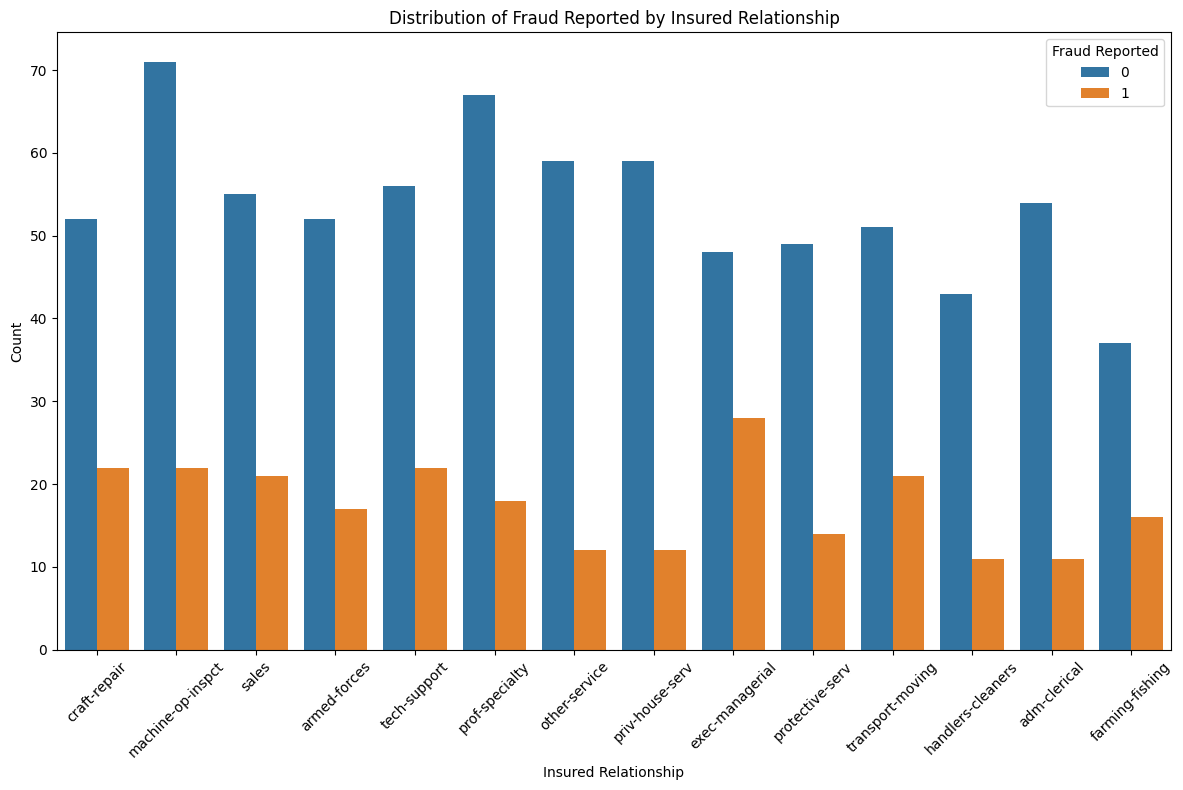

In [304]:
plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='insured_occupation', hue='fraud_reported_encoded')

plt.title('Distribution of Fraud Reported by Insured Relationship')
plt.xlabel('Insured Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')

plt.tight_layout()
plt.show()

Comments - We will convert this to into 3 categories depending upon the occupation.

In [305]:

blue_collar = ['machine-op-inspct', 'craft-repair', 'transport-moving', 'farming-fishing', 'handlers-cleaners']
white_collar = ['exec-managerial', 'prof-specialty', 'tech-support', 'sales', 'adm-clerical']
service_jobs = ['protective-serv', 'priv-house-serv', 'armed-forces', 'other-service']

def categorize_occupation(occupation):
    if occupation in blue_collar:
        return 'Blue-Collar Jobs'
    elif occupation in white_collar:
        return 'White-Collar Jobs'
    elif occupation in service_jobs:
        return 'Service Jobs'
    else:
        return 'Other'

df['insured_occupation_category'] = df['insured_occupation'].apply(categorize_occupation)


     months_as_customer  age  policy_csl  policy_deductable  \
0                   328   48           1               1000   
1                   228   42           1               2000   
2                   134   29           0               2000   
3                   256   41           1               2000   
4                   228   44           2               1000   
..                  ...  ...         ...                ...   
995                   3   38           2               1000   
996                 285   41           0               1000   
997                 130   34           1                500   
998                 458   62           2               2000   
999                 456   60           1               1000   

     policy_annual_premium  insured_sex insured_occupation insured_hobbies  \
0                  1406.91            1       craft-repair        sleeping   
1                  1197.22            1  machine-op-inspct         reading   
2        

In [306]:
df['insured_occupation_category'].value_counts()

,count
insured_occupation_category,
White-Collar Jobs,380
Blue-Collar Jobs,346
Service Jobs,274


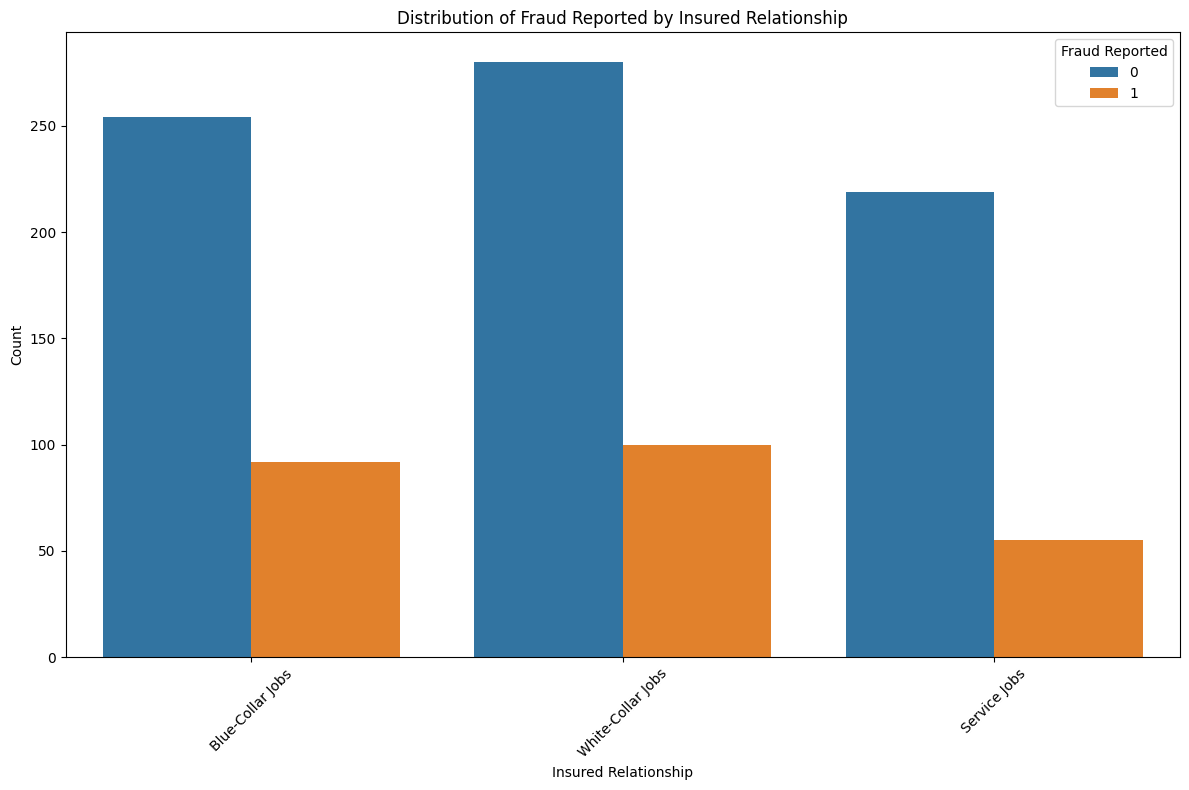

In [307]:
plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='insured_occupation_category', hue='fraud_reported_encoded')

plt.title('Distribution of Fraud Reported by Insured Relationship')
plt.xlabel('Insured Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported')

plt.tight_layout()
plt.show()

In [308]:
df.drop('insured_occupation', axis=1, inplace=True)

In [309]:
df['insured_occupation_category'] = df['insured_occupation_category'].map({'Blue-Collar Jobs': 1, 'White-Collar Jobs': 2, 'Service Jobs': 0})

Insured Hobbies

In [310]:
df['insured_hobbies'].value_counts()

,count
insured_hobbies,
reading,64
exercise,57
paintball,57
bungie-jumping,56
movies,55
golf,55
camping,55
kayaking,54
yachting,53


In [311]:
indoor_hobbies = ['reading', 'movies', 'video-games', 'board-games', 'chess', 'dancing', 'sleeping', 'cross-fit', 'exercise']
outdoor_hobbies = ['paintball', 'bungie-jumping', 'golf', 'camping', 'kayaking', 'yachting', 'hiking', 'skydiving', 'base-jumping', 'polo', 'basketball']

def categorize_hobby(hobby):
    if hobby in indoor_hobbies:
        return 'Indoor'
    elif hobby in outdoor_hobbies:
        return 'Outdoor'
    else:
        return 'Other'

df['hobby_category'] = df['insured_hobbies'].apply(categorize_hobby)

In [312]:
df['hobby_category'].value_counts()

,count
hobby_category,
Outdoor,561
Indoor,439


In [313]:
df['hobby_category'] = df['hobby_category'].map({'Indoor': 0, 'Outdoor': 1})

In [314]:
df.drop('insured_hobbies', axis=1, inplace=True)

Insured Relationship

In [315]:
df['insured_relationship'].value_counts()

,count
insured_relationship,
own-child,183
other-relative,177
not-in-family,174
husband,170
wife,155
unmarried,141


In [316]:
family = ['husband', 'wife', 'own-child', 'other-relative']
non_family = ['not-in-family', 'unmarried']

def group_relationship(relationship):
    if relationship in family:
        return 'Family'
    elif relationship in non_family:
        return 'Non-Family'
    else:
        return 'Other'

df['relationship_category'] = df['insured_relationship'].apply(group_relationship)




In [317]:
df['relationship_category'].value_counts()

,count
relationship_category,
Family,685
Non-Family,315


In [318]:
df['relationship_category'] = df['relationship_category'].map({'Family': 1, 'Non-Family': 0})

In [319]:
df.drop('insured_relationship', axis=1, inplace=True)

Incident Type

In [320]:
df['incident_type'].value_counts()

,count
incident_type,
Multi-vehicle Collision,419
Single Vehicle Collision,403
Vehicle Theft,94
Parked Car,84


In [321]:
df['incident_type_categorical'] = df['incident_type'].map({'Parked Car': 0, 'Vehicle Theft': 1, 'Single Vehicle Collision': 2, 'Multi-vehicle Collision': 3})

In [322]:
df.drop('incident_type', axis=1, inplace=True)

Collision Type

In [323]:
df['collision_type'].value_counts()

,count
collision_type,
Rear Collision,292
Side Collision,276
Front Collision,254
?,178


In [324]:
df['collision_type_categorical'] = df['collision_type'].map({'?': 0, 'Front Collision': 1, 'Side Collision': 2, 'Rear Collision': 3})

In [325]:
df.drop('collision_type', axis=1, inplace=True)

Authorities Contacted

In [326]:
df['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196


In [327]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('Other')

In [328]:
df['authorities_contacted_categorical'] = df['authorities_contacted'].map({'Police': 0, 'Fire': 1, 'Ambulance':2, 'Other': 3})

In [329]:
df.drop('authorities_contacted', axis=1, inplace=True)

Incident State

In [330]:
df['incident_state'].value_counts()

,count
incident_state,
NY,262
SC,248
WV,217
VA,110
NC,110
PA,30
OH,23


Comments- We will one-hot encode this column.

In [331]:
df = pd.get_dummies(df, columns=['incident_state'], prefix='state')

In [332]:
df.drop('state_NC', axis=1, inplace=True)

Auto Make

Comments - Since this column is causing way too much noise we will get rid of this.

In [333]:
df['auto_make'].value_counts()

,count
auto_make,
Saab,80
Dodge,80
Suburu,80
Nissan,78
Chevrolet,76
Ford,72
BMW,72
Toyota,70
Audi,69


In [334]:
df.drop('auto_make', axis=1, inplace=True)

Auto model

Comments - Since this column is causing too much noise we will get rid of this column as well.

In [335]:
df['auto_model'].value_counts()

,count
auto_model,
RAM,43
Wrangler,42
A3,37
Neon,37
MDX,36
Jetta,35
Passat,33
A5,32
Legacy,32


In [336]:
df.drop('auto_model', axis=1, inplace=True)

## Converting Booleans to Integers

In [337]:
df['state_NY'] = df['state_NY'].astype(int)
df['state_OH'] = df['state_OH'].astype(int)
df['state_PA'] = df['state_PA'].astype(int)
df['state_SC'] = df['state_SC'].astype(int)
df['state_VA'] = df['state_VA'].astype(int)
df['state_WV'] = df['state_WV'].astype(int)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   months_as_customer                 1000 non-null   int64  
 1   age                                1000 non-null   int64  
 2   policy_csl                         1000 non-null   int64  
 3   policy_deductable                  1000 non-null   int64  
 4   policy_annual_premium              1000 non-null   float64
 5   insured_sex                        1000 non-null   int64  
 6   capital-gains                      1000 non-null   int64  
 7   capital-loss                       1000 non-null   int64  
 8   incident_hour_of_the_day           1000 non-null   int64  
 9   number_of_vehicles_involved        1000 non-null   int64  
 10  bodily_injuries                    1000 non-null   int64  
 11  witnesses                          1000 non-null   int64 

In [339]:
df['fraud_reported_encoded'].value_counts()

,count
fraud_reported_encoded,
0,753
1,247


In [340]:
df['fraud_reported_encoded']

,fraud_reported_encoded
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


## Splitting between Training and Testing

In [341]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## Visualizations

Fraudulent Claims

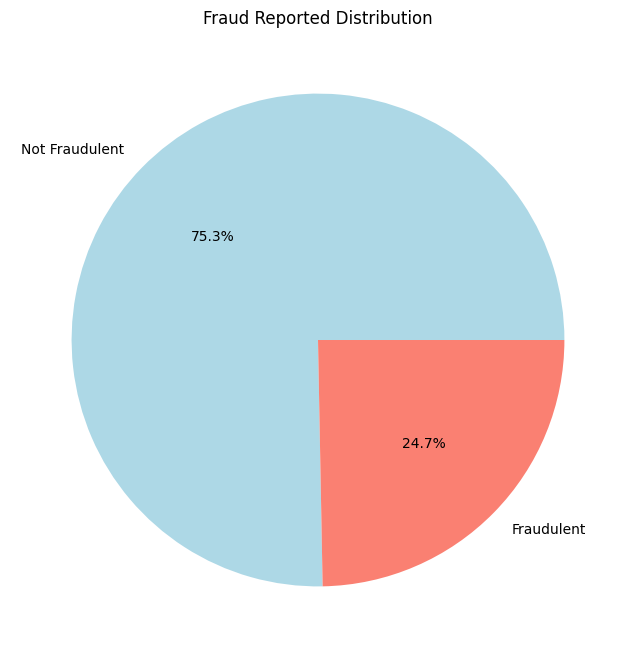

In [342]:
fraud_counts = df['fraud_reported_encoded'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['Not Fraudulent', 'Fraudulent'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Fraud Reported Distribution')
plt.show()


Total Claim Amount and Fraud Reported

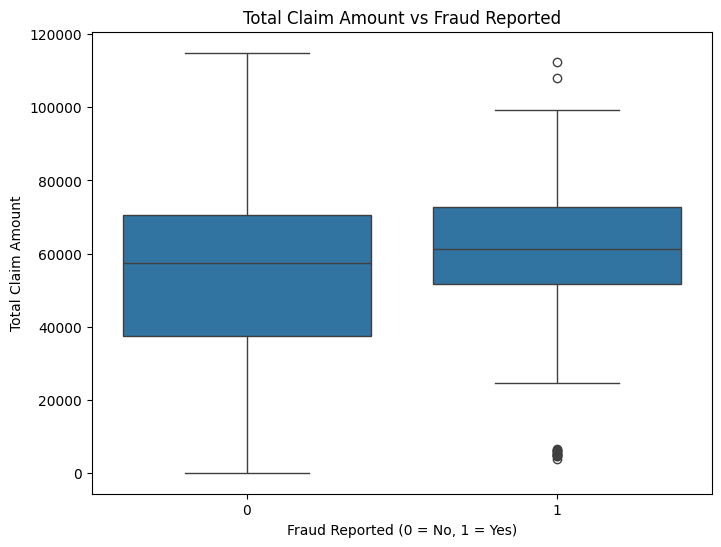

In [345]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud_reported_encoded', y='total_claim_amount', data=train_df)
plt.title('Total Claim Amount vs Fraud Reported')
plt.xlabel('Fraud Reported (0 = No, 1 = Yes)')
plt.ylabel('Total Claim Amount')
plt.show()


Incident Severity vs Policy Premium

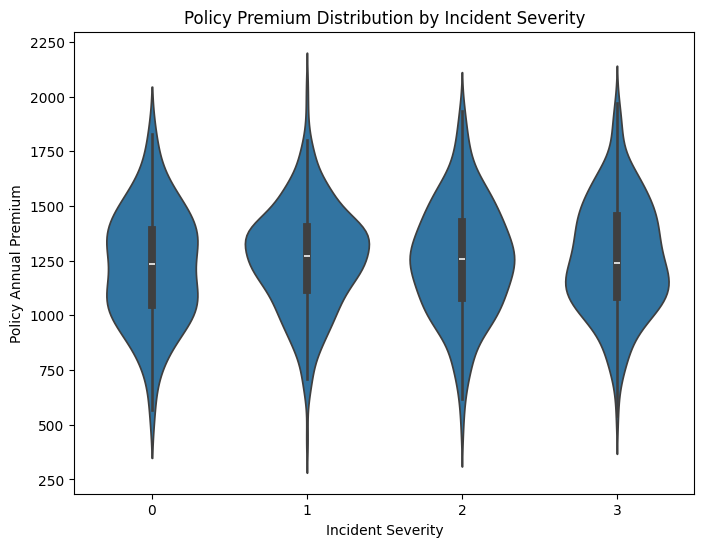

In [346]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='incident_severity_encoded', y='policy_annual_premium', data=train_df)
plt.title('Policy Premium Distribution by Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Policy Annual Premium')
plt.show()


Hobbies vs Fraud Reported

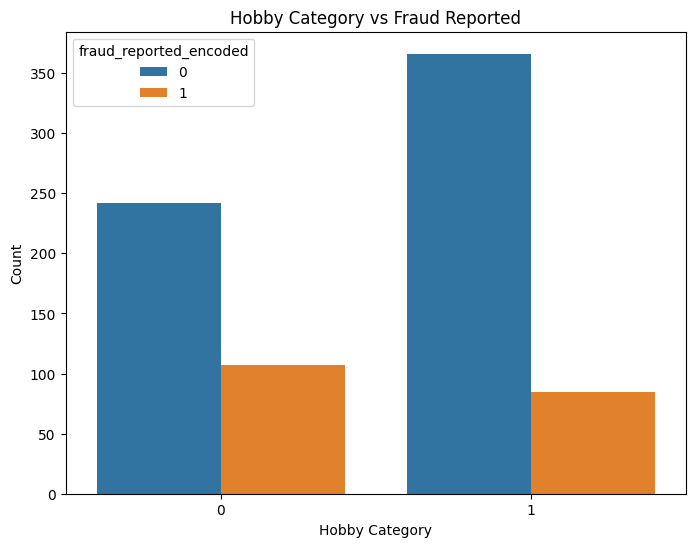

In [347]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hobby_category', hue='fraud_reported_encoded', data=train_df)
plt.title('Hobby Category vs Fraud Reported')
plt.xlabel('Hobby Category')
plt.ylabel('Count')
plt.show()


Number of vehicles involved vs Fraud Reported

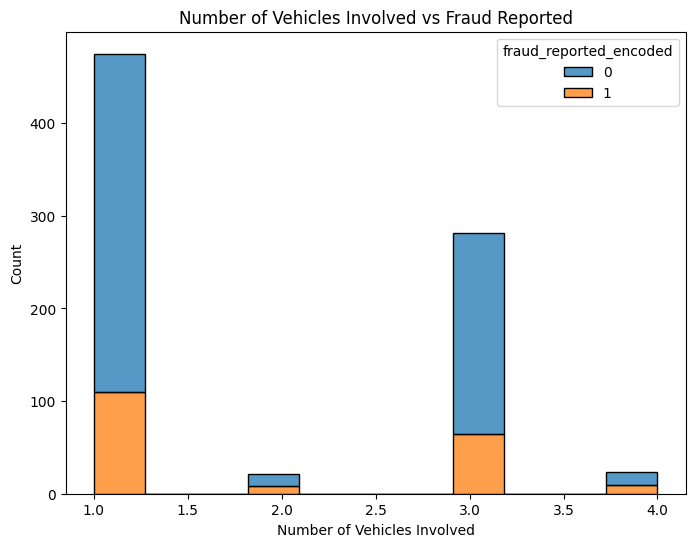

In [348]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='number_of_vehicles_involved', hue='fraud_reported_encoded', multiple='stack')
plt.title('Number of Vehicles Involved vs Fraud Reported')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Count')
plt.show()


Total claim amount vs Fraud Reported

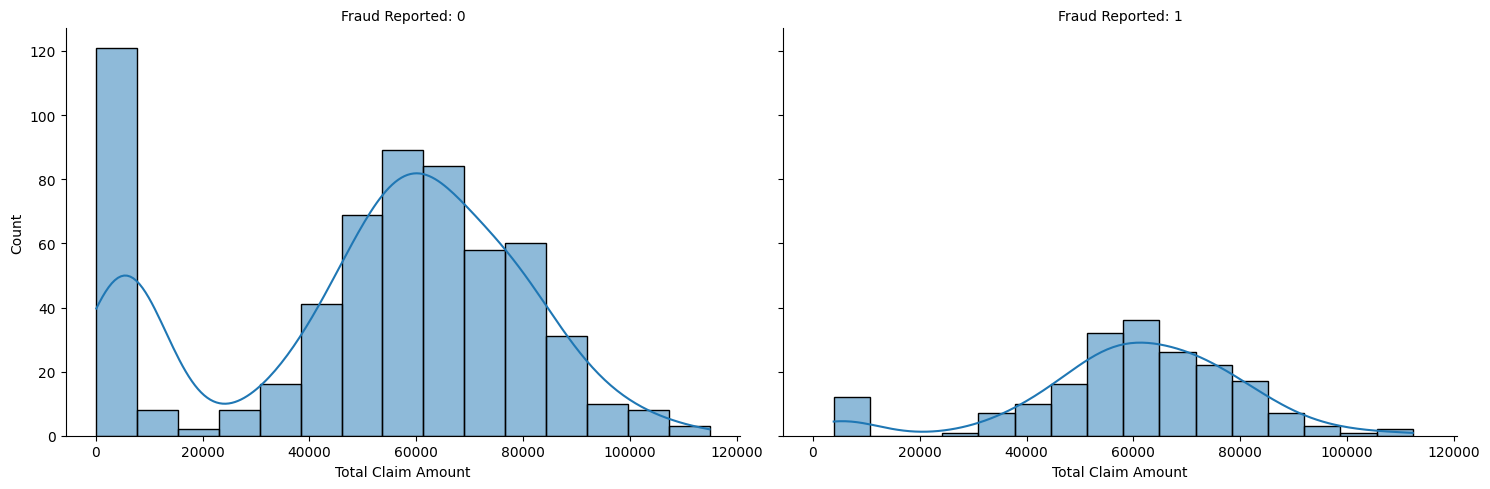

In [349]:
g = sns.FacetGrid(train_df, col='fraud_reported_encoded', height=5, aspect=1.5)
g.map(sns.histplot, 'total_claim_amount', kde=True)
g.set_axis_labels('Total Claim Amount', 'Count')
g.set_titles('Fraud Reported: {col_name}')
plt.show()


## Descriptions and Skewness

We wouldn't be touching the skewness this time as most of the columns are categorical in nature or are Integers.

In [381]:
df.describe()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,relationship_category,incident_type_categorical,collision_type_categorical,authorities_contacted_categorical,state_NY,state_OH,state_PA,state_SC,state_VA,state_WV
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,0.951000,1136.000000,1256.406150,0.463000,25126.100000,-26793.700000,11.644000,1.83900,...,0.685000,2.157000,1.68200,1.482000,0.262000,0.023000,0.030000,0.248000,0.110000,0.217000
std,115.113174,9.140287,0.804516,611.864673,244.167395,0.498879,27872.187708,28104.096686,6.951373,1.01888,...,0.464748,0.908392,1.07612,1.188734,0.439943,0.149978,0.170673,0.432068,0.313046,0.412409
min,0.000000,19.000000,0.000000,500.000000,433.330000,0.000000,0.000000,-111100.000000,0.000000,1.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,0.000000,500.000000,1089.607500,0.000000,0.000000,-51500.000000,6.000000,1.00000,...,0.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,38.000000,1.000000,1000.000000,1257.200000,0.000000,0.000000,-23250.000000,12.000000,1.00000,...,1.000000,2.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,276.250000,44.000000,2.000000,2000.000000,1415.695000,1.000000,51025.000000,0.000000,17.000000,3.00000,...,1.000000,3.000000,3.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,479.000000,64.000000,2.000000,2000.000000,2047.590000,1.000000,100500.000000,0.000000,23.000000,4.00000,...,1.000000,3.000000,3.00000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   months_as_customer                 1000 non-null   int64  
 1   age                                1000 non-null   int64  
 2   policy_csl                         1000 non-null   int64  
 3   policy_deductable                  1000 non-null   int64  
 4   policy_annual_premium              1000 non-null   float64
 5   insured_sex                        1000 non-null   int64  
 6   capital-gains                      1000 non-null   int64  
 7   capital-loss                       1000 non-null   int64  
 8   incident_hour_of_the_day           1000 non-null   int64  
 9   number_of_vehicles_involved        1000 non-null   int64  
 10  bodily_injuries                    1000 non-null   int64  
 11  witnesses                          1000 non-null   int64 

## Correlation Matrix

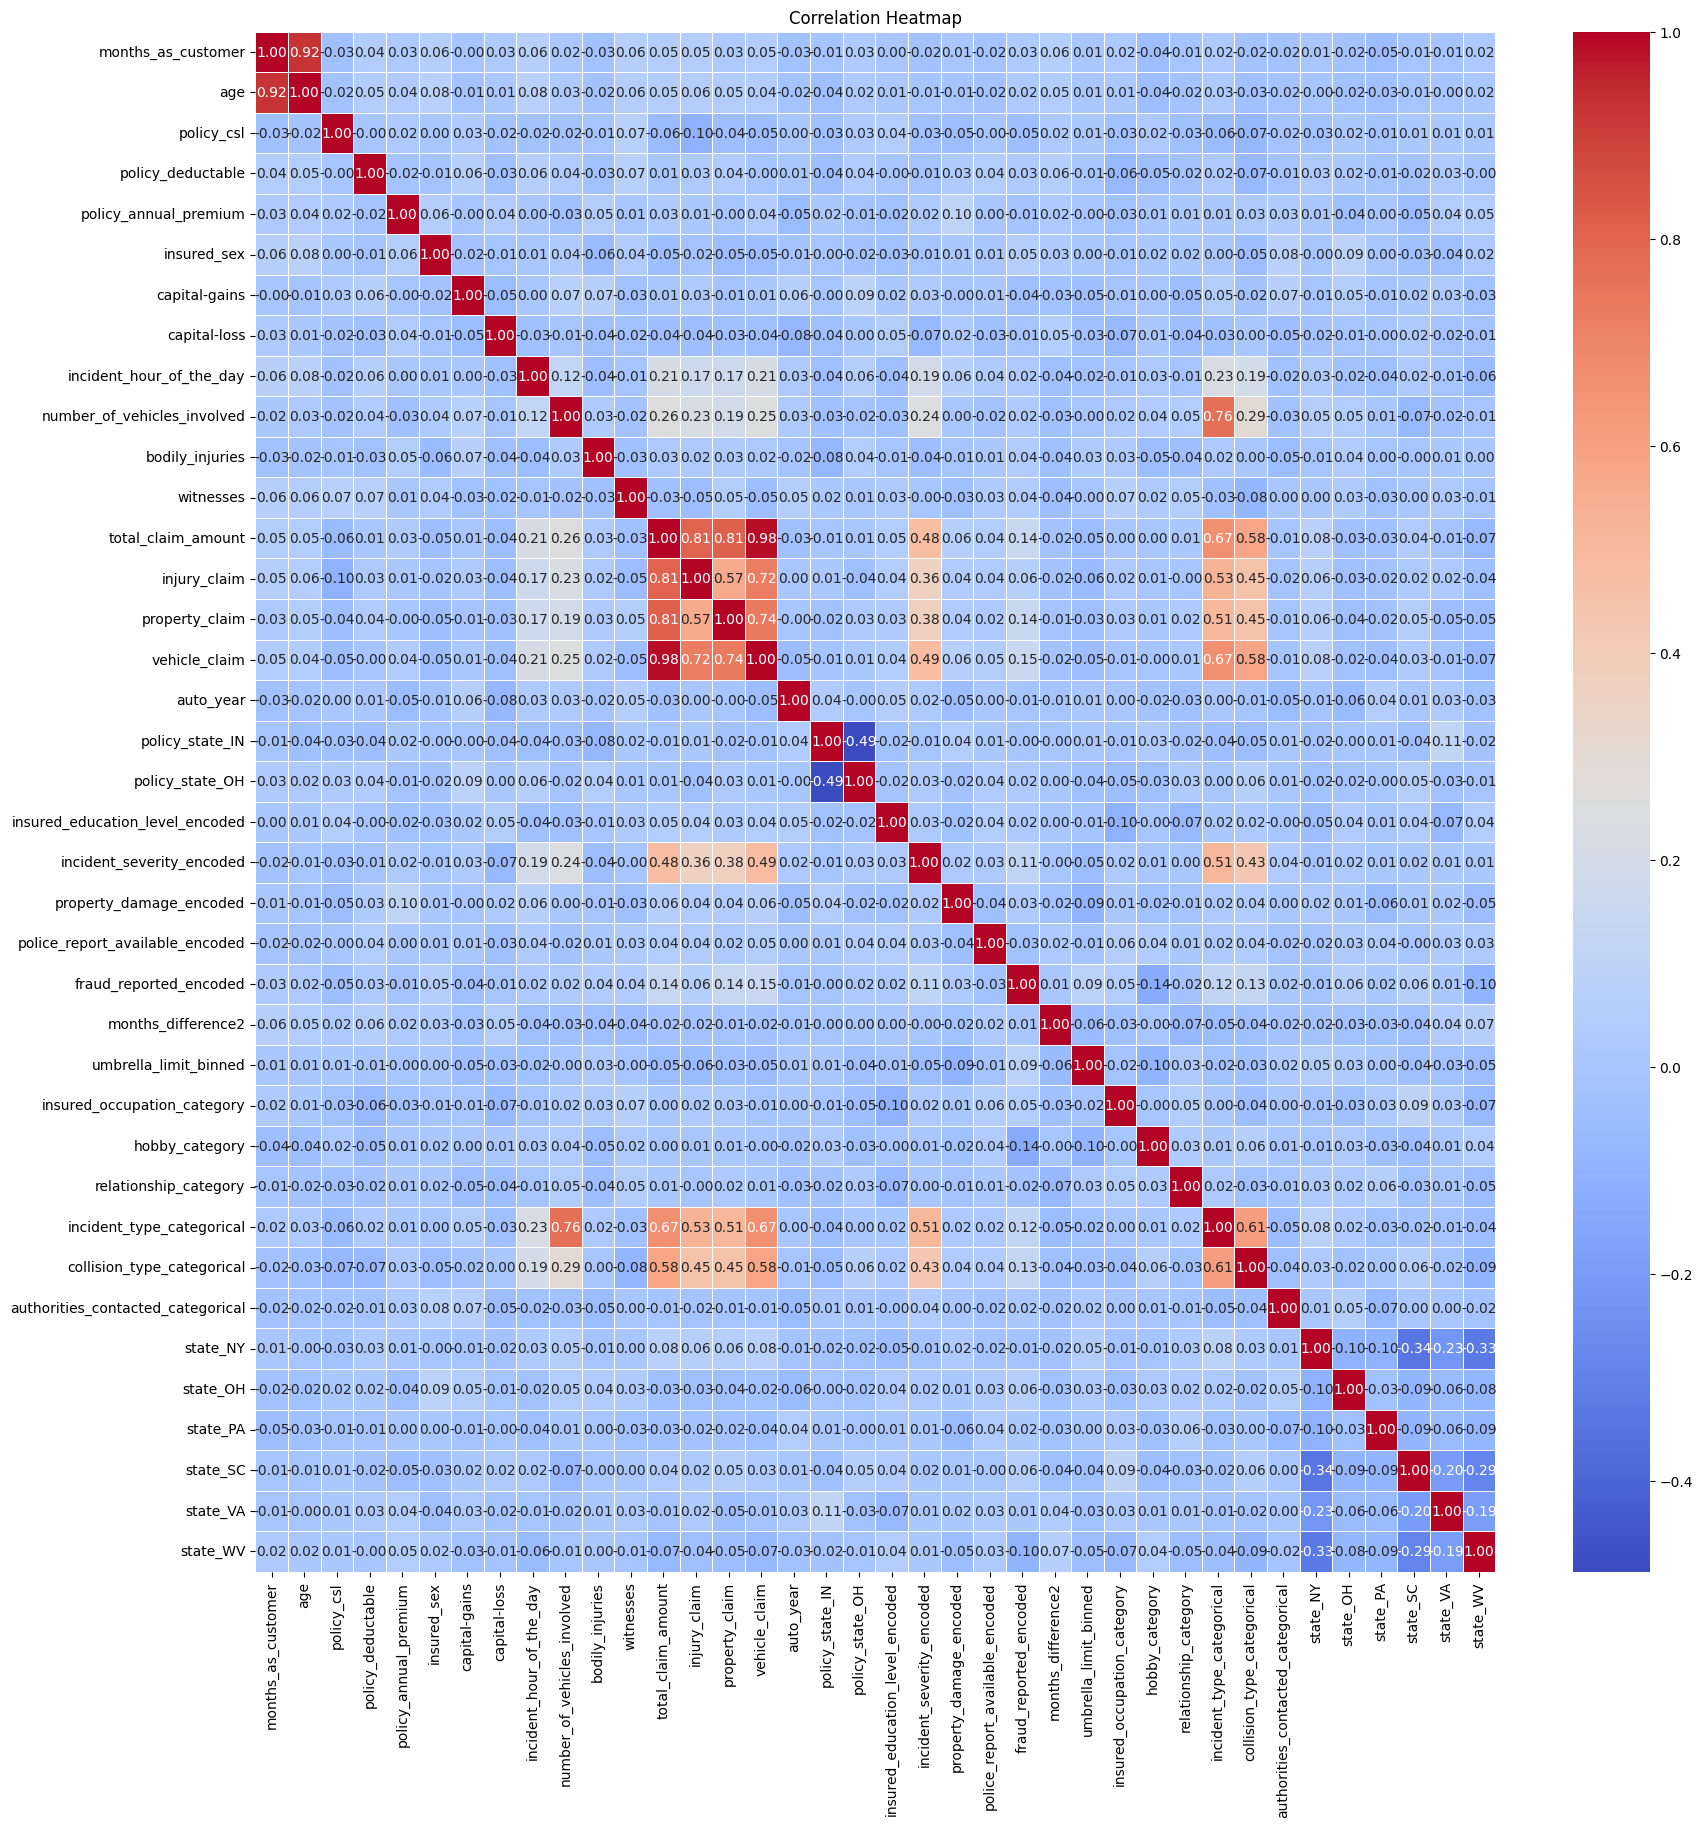

In [350]:
plt.figure(figsize=(20, 20))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Splitting into X_train, y_train, X_test, y_test

In [351]:
X_train = train_df.drop('fraud_reported_encoded', axis=1)
y_train = train_df['fraud_reported_encoded']

In [352]:
X_test = test_df.drop('fraud_reported_encoded', axis=1)
y_test = test_df['fraud_reported_encoded']

## Scaling

In [353]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [354]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

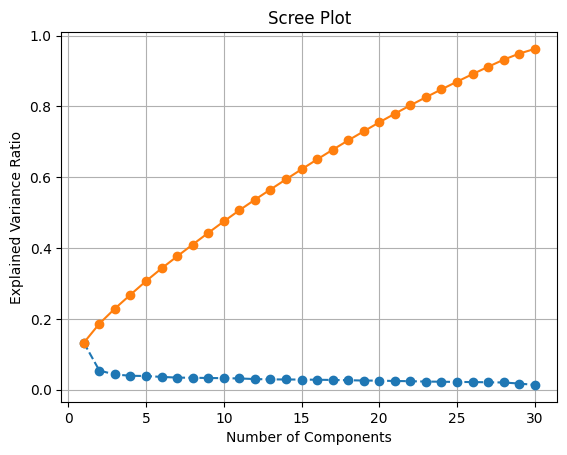

In [355]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## Models

In [356]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [357]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_pca, y_train)
sgd_clf.score(X_test_pca, y_test)

0.63

In [358]:
lr = LogisticRegression(penalty='l2',random_state=42)
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)

0.725

In [359]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)
dt.score(X_test_pca, y_test)

0.655

In [360]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train_pca, y_train)
rt.score(X_test_pca, y_test)

0.725

In [361]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train_pca, y_train)
svc_clf.score(X_test_pca, y_test)

0.725

In [362]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train)
knn_clf.score(X_test_pca, y_test)

0.68

In [369]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def lr_schedule(epoch, lr):
    initial_lr = 0.001
    decay = 0.1
    return initial_lr / (1 + decay * epoch)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint('best_model.keras',
                                    monitor='val_accuracy',
                                    save_best_only=True,
                                    mode='max')

lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

In [370]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

model = Sequential([
    Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_pca.shape[1],)),
    Dropout(0.25),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01),),
    Dropout(0.25),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01),),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-7),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [371]:
history = model.fit(X_train_pca, y_train,
                    validation_split = 0.1,
                    epochs=100, batch_size=32, callbacks = [lr_scheduler, model_checkpoint])



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5688 - loss: 1.7405 - val_accuracy: 0.8250 - val_loss: 1.4886 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009090909090909091.
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - loss: 1.5573 - val_accuracy: 0.8250 - val_loss: 1.3812 - learning_rate: 9.0909e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008333333333333334.
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7312 - loss: 1.4539 - val_accuracy: 0.8250 - val_loss: 1.2991 - learning_rate: 8.3333e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007692307692307692.
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7446 - loss: 1.3426 - val_accuracy: 0.8250 - val_loss: 1.2284 - learning_rate: 7.6923e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0007142857142857144.

In [372]:
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 0.6358 
Test Accuracy: 0.7250


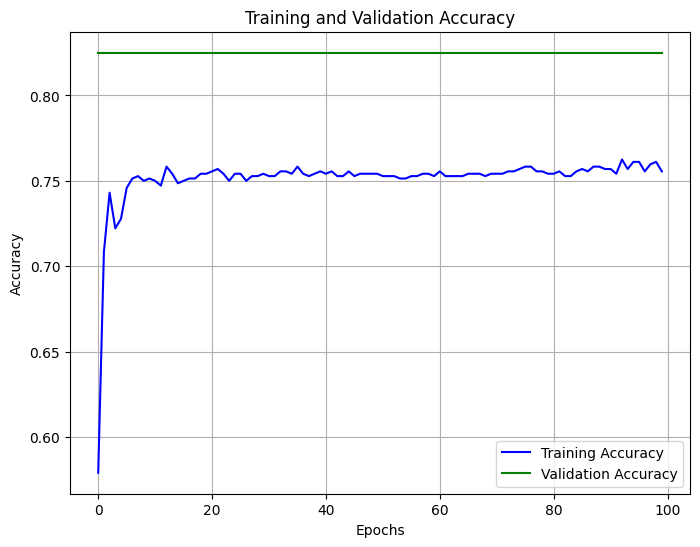

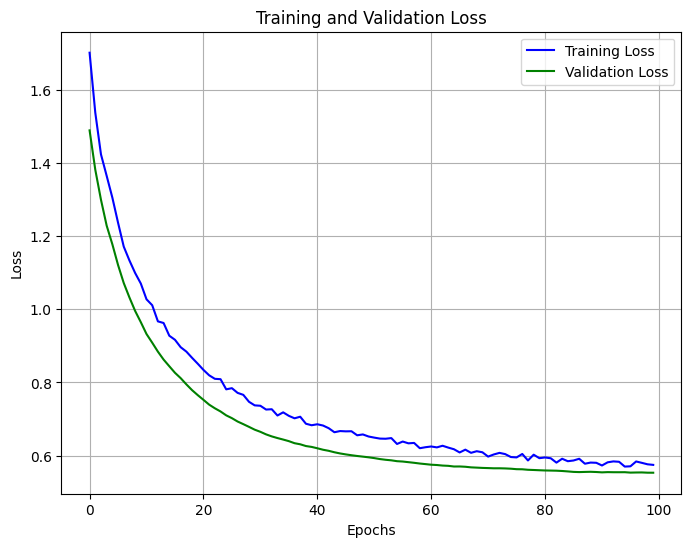

In [373]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Hyperparameter tuning our best model

In [374]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_pca, y_train)

best_rf = grid_search.best_estimator_

print("Best hyperparameters found: ", grid_search.best_params_)

test_score = best_rf.score(X_test_pca, y_test)
print(f"Test accuracy: {test_score:.4f}")


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
336 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/skle

Best hyperparameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test accuracy: 0.7300


In [376]:
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

rf_model.fit(X_train_pca, y_train)

y_pred = rf_model.predict(X_test_pca)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.7300


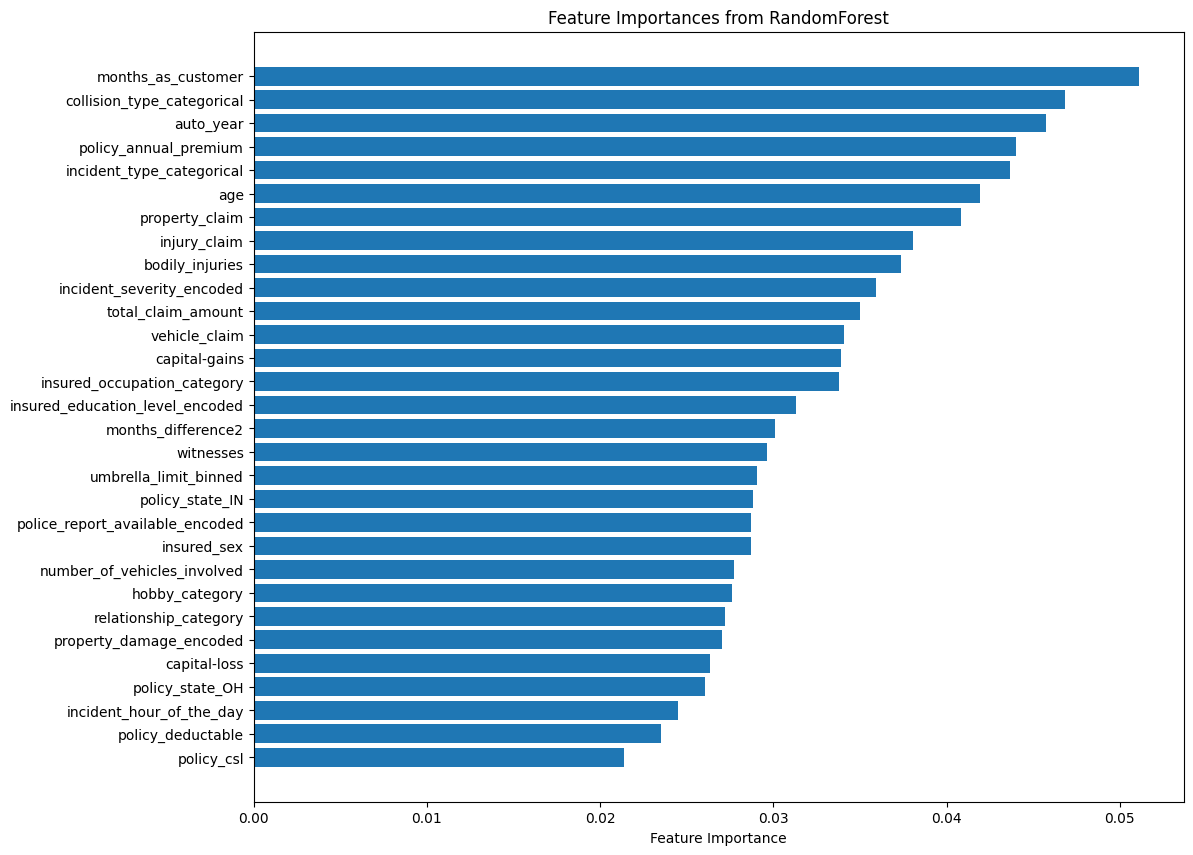

In [380]:
importances = rf_model.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [X_train.columns[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForest')
plt.show()


## Conclusion

The deep learning model did not perform well as the number of instances were too low for the model to understand any relationship between the predictor and the target column.

Hence, as usual the best model for us in the case is Random Forest with a Testing Accuracy of 73%.